In [7]:
import snap
import sys
sys.path.append('../src/data_cleaning/snair')
from clean_am import *
import matplotlib.pyplot as plt

In [8]:
G_Mes = snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/Mesentery_clean_EdgeList.txt", 0, 1, ' ')
G_LS174T = snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/LS174T_clean_EdgesList.txt", 0, 1, '\t')
G_SW1222 = snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/SW1222_clean_EdgesList.txt", 0, 1, '\t')

In [9]:
LS = read_am('../data/og_files/LS174T_spatialGraph_RIN.txt')
LS_edge_prop = edgeProps(LS)
LS_clean = cleanEdgelist(LS, LS_edge_prop)

In [10]:
SW = read_am('../data/og_files/SW122_spatialGraph_RIN.txt')
SW_edge_prop = edgeProps(SW)
SW_clean = cleanEdgelist(SW, SW_edge_prop)

In [14]:
node_cc = {}
NIdCCfH = snap.TIntFltH()
snap.GetNodeClustCf(G_LS174T, NIdCCfH)
for edge, attr in LS_clean.items():
    if edge[0] not in node_cc:
        node_cc[edge[0]] = (attr['srcRadius'], float(NIdCCfH[edge[0]]))
    if edge[1] not in node_cc:
        node_cc[edge[0]] = (attr['dstRadius'], float(NIdCCfH[edge[1]]))

radius_LS, cc_LS = zip(*node_cc.values())

In [ ]:
node_cc = {}
NIdCCfH = snap.TIntFltH()
snap.GetNodeClustCf(G_SW1222, NIdCCfH)
for edge, attr in SW_clean.items():
    if edge[0] not in node_cc:
        node_cc[edge[0]] = (attr['srcRadius'], float(NIdCCfH[edge[0]]))
    if edge[1] not in node_cc:
        node_cc[edge[0]] = (attr['dstRadius'], float(NIdCCfH[edge[1]]))

radius_SW, cc_SW = zip(*node_cc.values())

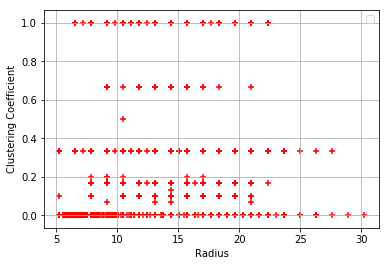

In [24]:
plt.scatter(radius_LS, cc_LS, marker = '+', color = 'r')
# plt.scatter(radius_SW, cc_SW, marker = '*', color = 'b')
plt.xlabel('Radius')
plt.ylabel('Clustering Coefficient')
plt.grid()
plt.legend()
plt.show()